In [ ]:
import pandas as pd
import numpy as np
import pymysql

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# preparing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modeling and evaluating
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from explore import anatomy_of_a_figure
from env import host, user, password
from pydataset import data

## Classification

<font color = red>**What is Classification?**</font>

Classification is a Supervised Machine Learning technique. Classification, like Regression, uses labeled data from a training dataset to learn rules for making future predictions on unseen data. However, Classification is used to predict the category membership of the categorical target value or label. For Classification algorithms, you determine the probability of an observation to be part of a certain class or not. Therefore, you express the probability with a value between 0 and 1. A probability close to 1 means the observation is very likely to be part of a group or category.

Simply put, Regression predicts a continuous variable while classification predicts a categorical variable.

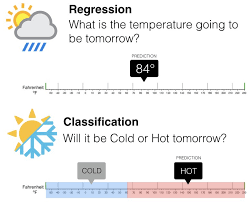

### <font color = orange>So What Are the Types of Classification?</font>

**Types of Classification**

**Binary Classification** - This type of classification uses a decision rule to predict an observation to be a member of one of only two groups: churn/not churn, pass/fail, male/female, smoker/non-smoker, healthy/sick.

**Multiclass Classification** - This type of classification uses a decision rule to predict an observation to be a member of one of three or more possible groups or categories: A/B/C, hot/warm/cold, Python/Java/C++/Go/C

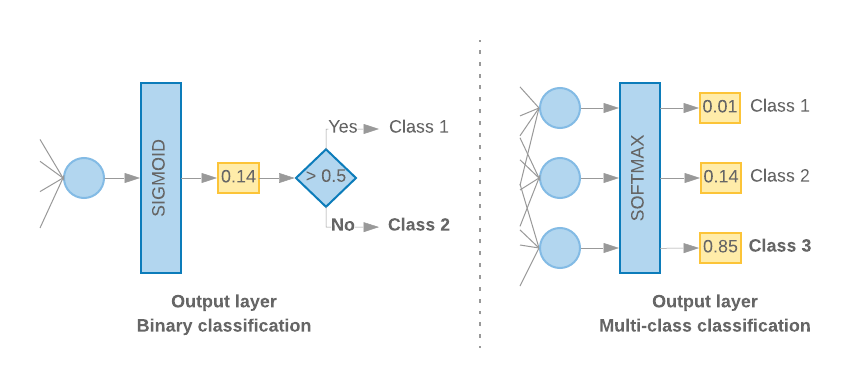

**Uses for Classification**

- Medical Diagnosis
- Spam Detection
- Credit Approval
- Targeted Marketing

### <font color = green>Now What?</font>
Check out this article below on Classification and Logistic Regression. Glean what is helpful to you, and don't feel like you need to understand anything we haven't covered yet unless you are so interested.

We will work through the data science pipeline focused on preparing for Classification Modeling.

<https://towardsdatascience.com/the-complete-guide-to-classification-in-python-b0e34c92e455>

### Acquire
A Few Example Methods for Reading Data into Pandas DataFrames

**From a Database**
Create your DataFrame using a SQL query to access a database.

<font color = purple>Use your env file info and create your sql query and create connection_url for use in pandas `read_sql()` function.</font>

In [ ]:
# Import private info to keep it secret in public files.
from env import host, password, user

# Test query in Sequel Pro and save to a variable.
sql_query = 'write your sql query here; test it in Sequel Pro first!'

# Save connection url to a variable for use with pandas `read_sql()` function.
connection_url = f'mysql+pymysql://{user}:{password}@{host}/database_name'

# Python function to read data from database into a DataFrame.
pd.read_sql(sql_query, connection_url)

In [ ]:
# Create sql query and save to variable.

sql_query = 'SELECT * FROM passengers'

In [ ]:
# Create connection url and save to a variable.

connection_url = f'mysql+pymysql://{user}:{password}@{host}/titanic_db'


In [ ]:
# Use my variables in the pandas read_sql() function.

titanic_df = pd.read_sql(sql_query, connection_url)
titanic_df.head(3)


<font color = purple>Put it all together in a single function that acquires new data from the Codeup database and save it, as well as any helper functions, in your `acquire.py` file.</font>

In [ ]:
# Create helper function to get the necessary connection url.
def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

# Use the above helper function and a sql query in a single function.
def get_db_data():
    '''
    This function reads data from the Codeup db into a df.
    '''
    sql_query = 'write your sql query here; test it in Sequel Pro first!'
    return pd.read_sql(sql_query, get_connection('database_name'))

In [ ]:
# Let's create a helper function that creates our connection url.

def get_connection(db, user=user, host=host, password=password):
    '''
    This function uses my info from my env file to
    create a connection url to access the Codeup db.
    '''
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [ ]:
def get_titanic_data():
    '''
    This function reads in the titanic data from the Codeup db
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = 'SELECT * FROM passengers'
    return pd.read_sql(sql_query, get_connection('titanic_db'))

In [ ]:
titanic_df = get_titanic_data()
titanic_df.head(3)


**From Files**
- Create your DataFrame from a csv file.

`df = pd.read_csv('file_path/file_name.csv')`

- Create your DataFrame from an AWS S3 file.

`df = pd.read_csv('https://s3.amazonaws.com/bucket_and_or_file_name.csv')`

- Create your DataFrame from a Google sheet using its Share url.

`sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'`

`csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')`

`df = pd.read_csv(csv_export_url)`

In [ ]:
# Assign our Google Sheet share url to a variable.

sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [ ]:
# Use the replace method to modify our url, so we can export it.

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [ ]:
# Use read_csv() method to create our DataFrame.

df_googlesheet = pd.read_csv(csv_export_url)
df_googlesheet.head(2)

### **From Your Clipboard**

Read copy-pasted tabular data and parse it into a DataFrame.

`pd.read_clipboard(header=None, names=colums)`

Here's a short and sweet article that explains it all nicely.

https://towardsdatascience.com/pandas-hacks-read-clipboard-94a05c031382

In [ ]:
# Read in one sheet from my_telco_churn excel workbook.

customers_df = pd.read_excel('my_telco_churn.xlsx', sheet_name='Table2_CustDetails')
customers_df.head(3)

### **From Pydataset**

Create your DataFrame using Pydataset and Read the Doc.

In [ ]:
from pydataset import data

data('iris', show_doc=True)

df_iris = data('iris')

In [ ]:
# Create DataFrame using pydataset 'iris'

df_iris = data('iris')
df_iris.head(3)

In [ ]:
# Using Seaborn Datasets

iris = sns.load_dataset('iris')
iris.head(3)

### **From Sklearn Datasets**

Create your DataFrame using Sklearn Datasets.

In [ ]:
# Using Sklearn Datasets, dictionary-like object

from sklearn import datasets

iris = datasets.load_iris()
type(iris)

In [ ]:
iris.keys()

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head(3)

In [ ]:
iris_df['species'] = iris.target
iris_df.head(3)

In [ ]:
More on sklearn dataset loading utilities here

https://scikit-learn.org/stable/datasets/index.html

Seaborn Datasets you can use are linked here

https://github.com/mwaskom/seaborn-data

## **Prepare**
This notebook will have an Imputing and Encoding focus. In Regression, I will focus more on scaling.

**What are Data Imputation and Data Encoding?**

**Imputation** is the process of replacing missing data with substituted values. You might choose to impute the mean, median, or mode of a given column to fill any holes or cells missing data. Maybe you want to do something a little more complex like use a linear regression model to predict the missing values that you will impute. Depending on the situation, you might just decide to drop rows or columns that have more than a certain percentage of missing values. Whatever you decide to do, you first need to inspect your dataset for Null values.

**Encoding** is when you convert a string to an integer representation making a categorical value useable in a ML model.

I'll demonstrate a few different techniques to handle these tasks below.

**So What Are They For?**

**Both imputing and encoding our data is part of preparing it for use in Machine Learning models.**

The simplest way to encode a categorical variable is with the pandas function `pd.get_dummies()`, so we'll look at that first. I perform this manipulation before I split. This is a great technique to start with and perfect place to build your understanding of encoding data.

**The encoding techniques below are performed after I split my data, so I will demonstrate them later in the notebook.**

Encoding with 'LabelEncoder()' converts each unique value in your chosen column into an integer representing the original categorical value. **This technique is useful when there is meaning to the order of your categorical values, or in other words, for ordinal values.**

One-hot Encoding is when we create a new column for each value in the oringinal column we wish to encode. Each observation in our DataFrame will have either a 0 or a 1 to indicate which of the new columns represents its value in the original column. **This is useful when the order of your categorical values does not carry meaning, or in other words, for nominal values.** Beware of the curse of dimensionality when using One-hot; it can quickly increase the number of columns, and therfore complexity, of your model exponentially.

Take a deeper look at these various techniques in this arcticle and in this beginner's guide to encoding data.

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

https://towardsdatascience.com/beginners-guide-to-encoding-data-5515da7f56ab

**Now What?**

Let's take a look at our data and decide what variables may need imputing, encoding, or just dropped. I might also decide to create new columns in prepare.

`.map()` **to Create Column**

I'm adding a column here, is_female, and demonstrating how I could do that using df.map(). This is a very simple way to create one binary column from two columns thus reducing the dimensionality of my dataset

In [ ]:
titanic_df['is_female'] = titanic_df.sex.map({'female': 1, 'male': 0})

titanic_df.head(3)

`.isna()` and `.isnull()`

I'll quickly check my dataset for missing values:

Here's a cool way to use a heatmap to visualize Null values in your dataset.

In [ ]:
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column')
plt.show()

**Examine total missing values by column; this can help me make some decisions about imputing and dropping.**

In [ ]:
titanic_df.isna().sum()

**Examine percent of missing values by column; I can begin to decide how to handle my missing values based on this**

In [ ]:
round(titanic_df.isna().mean() * 100, 2)

**I can check any missing values by subgroups if I really want to dig down.**

In [ ]:
titanic_df.groupby(['survived', 'pclass', 'sex']).agg(lambda s: s.isna().sum())

**Encoding Technique Before Splitting**

`pd.get_dummies()`

Remeber that I perform this manipulation here before I split my data. This is a simple way to encode categorical variables, and we will look at some more sophisticated techniques a bit farther down.

In [ ]:
# First I create a new dataframe that holds my encoded columns.

embarked_dummies = pd.get_dummies(titanic_df.embarked, drop_first=True)
embarked_dummies.sample(5)

In [ ]:
# Then I add my encoded columns back onto my original dataframe.

titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)

In [ ]:
titanic_df.sample(2)

'.drop()'

If I'm going to drop any columns or rows, I can do it right here before the split. There are some categorical columns I'm not dropping because I want to use them in explore. I'm choosing to keep my dataframe exploration-friendly, and I can curate columns for modeling later.

In [ ]:
titanic_df = titanic_df.drop(columns=['deck', 'passenger_id', 'embarked'])
titanic_df.info()

## Split Your Data

**Split before you begin exploring variable relationships or performing calculations like find the mean to impute for missing values.**

### **What is Splitting?**

At this stage, you will create train (in-sample), validate (out-of-sample), and test (out-of-sample) dataframes using the train_test_split function from Sklearn. This will randomly split your dataset into train, validate, and test by the percentage you pass into the function. You will use the train set to do exactly that, train your model to make predictions. You will use your validate set to evalute your model's performance on unseen data and ensure that it didn't learn too much from your train set causing it to 'overfit' on a particular set of data. You will repeat that process for each model you create, and finally you will choose your best model to use with your test dataset.

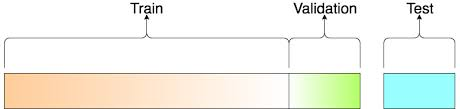

<font color = red>Be Aware:</font> You may need to stratify your split on a particular feature, so that the proportion of a feature's values is the same in your train, validate, and test datasets. You can pass the stratify parameter as an option to your train_test_split.

In [ ]:
from sklearn.model_selection import train_test_split

# Create test dataset

train_validate, test = train_test_split(df, 
                                        test_size=.2, 
                                        random_state=123, 
                                        stratify=df.target)
# Create train and validate datsets

train, validate = train_test_split(train_validate, 
                                   test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.target)

# Take a look at your split datasets

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

In [ ]:
train_validate, test = train_test_split(titanic_df, test_size=.2, 
                                        random_state=123, 
                                        stratify=titanic_df.survived)

train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)

In [ ]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

**Split Function**

I can create a function that does one thing, split my titanic data into train, validate, and test.

In [ ]:
def split_data(df):
    '''
    Takes in the titanic df and returns train, validate, and test dfs.
    '''
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df.survived)

    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate.survived)
    return train, validate, test

In [ ]:
train, validate, test = split_data(titanic_df)

In [ ]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

**So What?**

You may **explore individual variables before splitting** your data into train, validate, and test datasets, so that you can look at distributions, identify outliers, Nulls, etc. However, **when looking at interactions of variables**, your data should first be split before you explore. You should also split your data **before** you scale. This is because your validate and test data should remain unseen as much as possible as it is supposed to be unknown at this stage.

An important component of Data Science is that peers must be able to replicate what you have done to your data, especially if you are going to deploy your model to be used in the future. By splitting your data into train, validate, and test sets early on in the pipeline, you are also confirming that any processing you completed on your train set is repeatable on your validate and test datasets as well as unseen future sets.

**Now What?**

Now I can investigate the relationship between two columns.

Check out more on crosstabs and pivot tables here.

In [ ]:
pd.crosstab(train.sibsp, train.parch)

**Imputing Techniques**

`.fillna()`

Fill null values in a column in your datasets with a constant like 0; reassign to original dataframes.

In [ ]:
train['col'] = train['col'].fillna(0)

validate['col'] = validate['col'].fillna(0)

test['col'] = test['col'].fillna(0)

**Fill null values in a column with the overall average from the training data.**

In [ ]:
#Calculate our fill value using train dataset only.

avg_age = train.age.mean()

# Fill null values in all of our datasets using our hardcoded value.

train.age = train.age.fillna(avg_age)

validate.age = validate.age.fillna(avg_age)

test.age = test.age.fillna(avg_age)

In [ ]:
# Validate that our fill was successful.

sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap='Blues')

plt.title('Null Values by Column After Handling Nulls in Age')
plt.show()

**Prepare Function**

I can put all of the steps I used throughout prepare into a function making my process easy to reproduce.

In [ ]:
def prep_titanic_data(df):
    '''
    Takes in the titanic df and creates an is_female column, creates dummy vars for embarked,
    drops ['deck', 'passenger_id', 'embarked'] cols, and splits data
    Returns train, validate, and test dfs.
    '''
    # Encode gender in one column.
    df['is_female'] = df.sex.map({'female': 1, 'male': 0})
    
    # Encode embarked by creating dummy vars and concat with original df
    embarked_dummies = pd.get_dummies(df.embarked, drop_first=True)
    df = pd.concat([df, embarked_dummies], axis=1)
    
    # Drop ['deck', 'passenger_id', 'embarked'] cols
    df = df.drop(columns=['deck', 'passenger_id', 'embarked'])
    train, validate, test = split_data(df)
    
    #Calculate our fill value for age using train dataset only.
    avg_age = train.age.mean()

    # Fill null values in all of our datasets using our hardcoded value.
    train.age = train.age.fillna(avg_age)
    validate.age = validate.age.fillna(avg_age)
    test.age = test.age.fillna(avg_age)
    
    return train, validate, test

In [ ]:
titanic_df = get_titanic_data()
train, validate, test = prep_titanic_data(titanic_df)
train.head()

`.SimpleImputer()`

We can also use some more sophisticated techniques using sklearn. Create the imputer; pick your strategy.

In [ ]:
from sklearn.impute import SimpleImputer

# I can impute the mean value in a column

imputer = sklearn.impute.SimpleImputer(missing_values=np.NaN, strategy='mean')

# I can impute the mode value in a column

imputer = sklearn.impute.SimpleImputer(missing_values = None, strategy='most_frequent')

**Fit the imputer to train dataframe.**

In [ ]:
imputer = imputer.fit(train[['column']])

**Use the Imputer on train, validate, and test dataframes and reassign to dataframes.**

In [ ]:
# Acquire and split fresh data, so I can demo imputing the mode for embark_town.

titanic_df = get_titanic_data()
train, validate, test = prep_titanic_data(titanic_df)

In [ ]:
train.head()

In [ ]:
train.embark_town.value_counts(dropna=False)

In [ ]:
# Create the imputer object.

imputer = SimpleImputer(missing_values = None, strategy='most_frequent')

In [ ]:
# Fit the imputer object.

imputer = imputer.fit(train[['embark_town']])

In [ ]:
# Use the imputer I fit on train to transform train, validate, and test which fills missing values.

train[['embark_town']] = imputer.transform(train[['embark_town']])
validate[['embark_town']] = imputer.transform(validate[['embark_town']])
test[['embark_town']] = imputer.transform(test[['embark_town']])

In [ ]:
train.embark_town.value_counts(dropna=False)

**Modify Prepare Function**

I can add the steps I took above to impute the mode value for any missing values in the `embark_town` column to my `prep_titanic` function; normally this would not be in my notebook but instead hidden away in a prepare module, but I'm demonstrating process in this notebook.

In [ ]:
def prep_titanic_data(df):
    '''
    Takes in the titanic df and creates an is_female column, creates dummy vars for embarked,
    drops ['deck', 'passenger_id', 'embarked'] cols, splits the data into train, validate, and test,
    and imputes the mode value in 'embark_town' for missing values.
    Returns train, validate, and test dfs.
    '''
    # Encode gender in one column.
    df['is_female'] = df.sex.map({'female': 1, 'male': 0})
    
    # Encode embarked by creating dummy vars and concat with original df
    embarked_dummies = pd.get_dummies(df.embarked, drop_first=True)
    df = pd.concat([df, embarked_dummies], axis=1)
    
    # Drop ['deck', 'passenger_id', 'embarked'] cols
    df = df.drop(columns=['deck', 'passenger_id', 'embarked'])
    train, validate, test = split_data(df)
    
    #Calculate our fill value for age using train dataset only.
    avg_age = train.age.mean()

    # Fill null values in all of our datasets using our hardcoded value.
    train.age = train.age.fillna(avg_age)
    validate.age = validate.age.fillna(avg_age)
    test.age = test.age.fillna(avg_age)
    
    # Create the imputer object.
    imputer = SimpleImputer(missing_values = None, strategy='most_frequent')
    
    # Fit the imputer object.
    imputer = imputer.fit(train[['embark_town']])
    
    # Use the imputer I fit on train to transform train, validate, and test which fills missing values.
    train[['embark_town']] = imputer.transform(train[['embark_town']])
    validate[['embark_town']] = imputer.transform(validate[['embark_town']])
    test[['embark_town']] = imputer.transform(test[['embark_town']])
    
    return train, validate, test

**Encoding Techniques AFTER Splitting**

`LabelEncoder()`

**Create the Encoder Object.**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

**Fit and Transform train dataset and reassign.**

In [ ]:
train['col'] = le.fit_transform(train.col_to_encode)

**Transform validate and test datasets and reassign.**

In [ ]:
validate['col'] = le.transform(validate.col_to_encode)

test['col'] = le.transform(test.col_to_encode)

**Decode Your Encoded Column.**

In [ ]:
train['col'] = le.inverse_transform(train.col_to_decode)

validate['col'] = le.inverse_transform(validate.col_to_decode)

test['col'] = le.inverse_transform(test.col_to_decode)

`OneHotEncoder()`

**Create the OHE Object.**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False, categories='auto')

**Fit and Transform train to create an array of values.**

In [ ]:
train_matrix = ohe.fit_transform(train[['col']])

**Transform validate and test to create arrays of values.**

In [ ]:
validate_matrix = ohe.transform(validate[['col']])

test_matrix = ohe.transform(test[['col']]

**Convert Arrays to dataframes of Encoded Columns.**

In [ ]:
train_ohe = pd.DataFrame(train_matrix, columns=ohe.categories_[0], index=train.index)

validate_ohe = pd.DataFrame(validate_matrix, columns=ohe.categories_[0], index=validate.index)

test_ohe = pd.DataFrame(test_matrix, columns=ohe.categories_[0], index=test.index)

**Join Your dataframes of Encoded Columns to your original dataframes.**

In [ ]:
train = train.join(train_ohe)

validate = validate.join(validate_ohe)

test = test.join(test_ohe)

## Explore

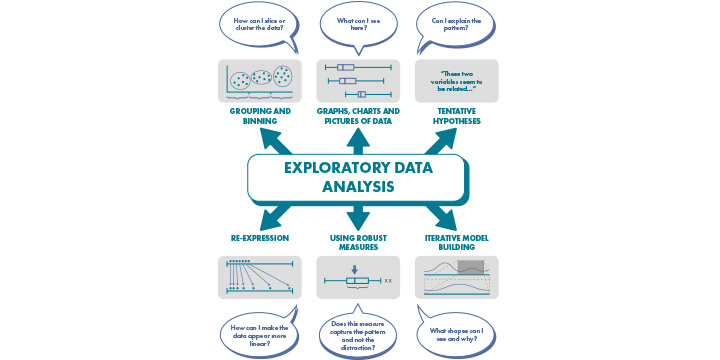